# Midterm Assignment

### Exercise 6.1

#### a

The following code the empirical test. A random dataset with 10000 samples is generated and each entry has 10 features. The result shows empirically that the information limit of 2 prediction bits per parameter also holds for nearest neighbors.

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from math import log2

# Generate synthetic data for classification
def generate_data_classification(n_samples, n_features, n_classes):
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes, n_clusters_per_class=1)
    return X, y

# Nearest Neighbors for classification
def nearest_neighbors_classification(X_train, y_train, k):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_train)
    return y_pred

# Calculate information limit in bits per sample
def calculate_information_limit(y_train, y_pred):
    cnt = 0
    for i in range(len(y_train)):
        if y_train[i] == y_pred[i]:
            cnt += 1
    acc = cnt / len(y_train)
    if acc == 0:
        return 0
    return 1 / acc

# Main function to perform classification experiment
def main():
    print("Classification Experiment:")
    n_samples = 10000
    n_features = 10
    n_classes = 2
    X_train, y_train = generate_data_classification(n_samples, n_features, n_classes)

    k_values = [1, 3, 5, 10, 100, 200, 500, 1000, 5000]  # Number of neighbors
    for k in k_values:
        y_pred = nearest_neighbors_classification(X_train, y_train, k)
        information_limit = calculate_information_limit(y_train, y_pred)
        print(f"K = {k}, Information Limit: {information_limit} bits per sample")

if __name__ == "__main__":
    main()


Classification Experiment:
K = 1, Information Limit: 1.0 bits per sample
K = 3, Information Limit: 1.0050251256281406 bits per sample
K = 5, Information Limit: 1.0050251256281406 bits per sample
K = 10, Information Limit: 1.0052271813429834 bits per sample
K = 100, Information Limit: 1.0060362173038229 bits per sample
K = 200, Information Limit: 1.0062386798148522 bits per sample
K = 500, Information Limit: 1.0067451927917044 bits per sample
K = 1000, Information Limit: 1.0071507704703393 bits per sample
K = 5000, Information Limit: 1.0072522159548751 bits per sample


#### b

The property still holds for multi-class classification as the following experiment shows:

In [4]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from math import log2

# Generate synthetic data for classification
def generate_data_classification(n_samples, n_features, n_classes):
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes, n_clusters_per_class=1)
    return X, y

# Nearest Neighbors for classification
def nearest_neighbors_classification(X_train, y_train, k):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_train)
    return y_pred

# Calculate information limit in bits per sample
def calculate_information_limit(y_train, y_pred):
    cnt = 0
    for i in range(len(y_train)):
        if y_train[i] == y_pred[i]:
            cnt += 1
    acc = cnt / len(y_train)
    if acc == 0:
        return 0
    return 1 / acc

# Main function to perform classification experiment
def main():
    print("Classification Experiment:")
    n_samples = 10000
    n_features = 10
    n_classes = 4
    X_train, y_train = generate_data_classification(n_samples, n_features, n_classes)

    k_values = [1, 3, 5, 10, 100, 200, 500, 1000, 5000]  # Number of neighbors
    for k in k_values:
        y_pred = nearest_neighbors_classification(X_train, y_train, k)
        information_limit = calculate_information_limit(y_train, y_pred)
        print(f"K = {k}, Information Limit: {information_limit} bits per sample")

if __name__ == "__main__":
    main()


Classification Experiment:
K = 1, Information Limit: 1.0 bits per sample
K = 3, Information Limit: 1.0954102311315588 bits per sample
K = 5, Information Limit: 1.1019283746556474 bits per sample
K = 10, Information Limit: 1.1176930814798256 bits per sample
K = 100, Information Limit: 1.1535355865728458 bits per sample
K = 200, Information Limit: 1.1742602160638798 bits per sample
K = 500, Information Limit: 1.2442453651860148 bits per sample
K = 1000, Information Limit: 1.273560876209883 bits per sample
K = 5000, Information Limit: 1.3717421124828533 bits per sample


### Exercise 6.2

#### a

I chose the Breast Cancer Wisconsin dataset for binary classification. The objective is to devise strategies that minimize the number of if-then clauses while maximizing classification accuracy. To achieve this, I employed Decision Trees, a model known for its interpretability and expressiveness in forming if-then rules.


For strategies, I deisgn variation in max depth. I utilized different values for the max depth hyperparameter in the Decision Tree model. This parameter controls the maximum depth of the tree, influencing the complexity of the resulting decision rules. By adjusting this parameter, I aimed to strike a balance between model complexity and predictive performance.

Finally, I plotted the decision trees to visualize the rules that were formed. This visualization aided in understanding the model's decision-making process and the factors that influenced the classification accuracy.


As the max depth increases from 2 to 10, there's a slight decrease in accuracy from 0.9280 to 0.9138. However, further increasing the max depth to 50 and 100 results in accuracy levels similar to that at max depth 10, hovering around 0.9156 to 0.917. Remarkably, the number of if-then clauses remains consistent at 42 for max depths of 10, 50, and 100, indicating that the decision tree structures are similar beyond a certain depth. This suggests that additional depth beyond 10 doesn't lead to a more complex decision tree structure in terms of the number of if-then clauses. We can see that while deeper trees may theoretically capture more intricate patterns in the data, the marginal gain in accuracy diminishes as the tree becomes deeper. The consistent number of if-then clauses beyond max depth 10 also implies that increasing the depth further doesn't lead to additional complexity in the decision rules.

The detailed results and visualizations are as follows:

Max Depth: 2, Accuracy: 0.9280
Max Depth: 2, Number of if-then clauses: 6
Max Depth: 10, Accuracy: 0.9138
Max Depth: 10, Number of if-then clauses: 42
Max Depth: 50, Accuracy: 0.9156
Max Depth: 50, Number of if-then clauses: 42
Max Depth: 100, Accuracy: 0.9174
Max Depth: 100, Number of if-then clauses: 42


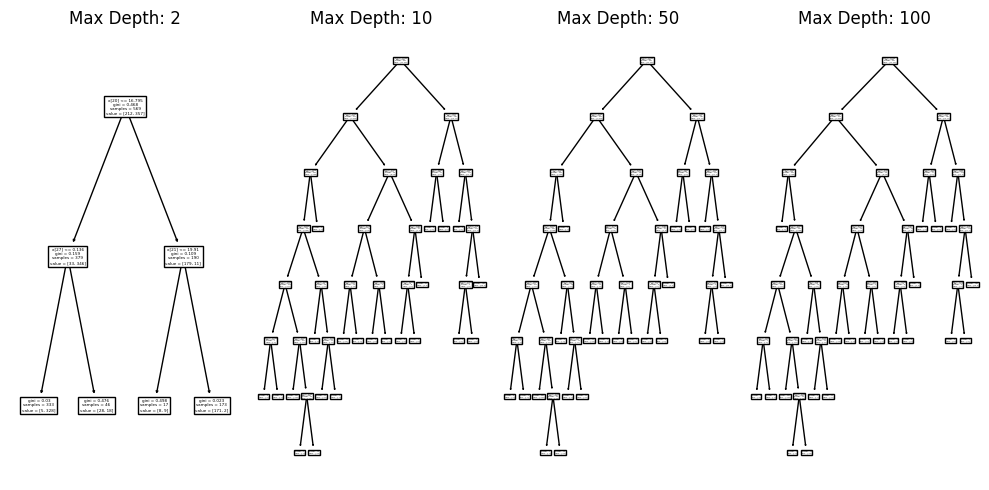

In [67]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target


max_depth_values = [2, 10, 50, 100]


fig, axes = plt.subplots(nrows=1, ncols=len(max_depth_values), figsize=(10, 5))


for i, max_depth in enumerate(max_depth_values):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    
    accuracy = cross_val_score(clf, X, y, cv=5).mean()
    
    print(f"Max Depth: {max_depth}, Accuracy: {accuracy:.4f}")
    
    clf.fit(X, y)
    
    tree.plot_tree(clf, ax=axes[i])
    axes[i].set_title(f"Max Depth: {max_depth}")
    print(f"Max Depth: {max_depth}, Number of if-then clauses: {clf.tree_.node_count - 1}")

plt.tight_layout()
plt.show()


#### b

For another experimental exploration, I turned to the Iris dataset. I applied the same strategy of varying the depth of Decision Trees to investigate its impact on model complexity, accuracy, and interpretability. The results are similar to the Breast Cancer Wisconsin dataset: the number of if-then clauses remains consistent at 16 for max depths of 10, 50, and 100. But a difference is that as the max depth increases from 2 to 50, there's a obvious increase in accuracy from 0.9333 to 0.9667. But further increasing the max depth to 100 leads to decrease in accuracy, dropping from 0.9667 to 0.9533.

The detailed results and visualizations are as follows:

Max Depth: 2, Accuracy: 0.9333
Max Depth: 2, Number of if-then clauses: 4
Max Depth: 10, Accuracy: 0.9667
Max Depth: 10, Number of if-then clauses: 16
Max Depth: 50, Accuracy: 0.9667
Max Depth: 50, Number of if-then clauses: 16
Max Depth: 100, Accuracy: 0.9533
Max Depth: 100, Number of if-then clauses: 16


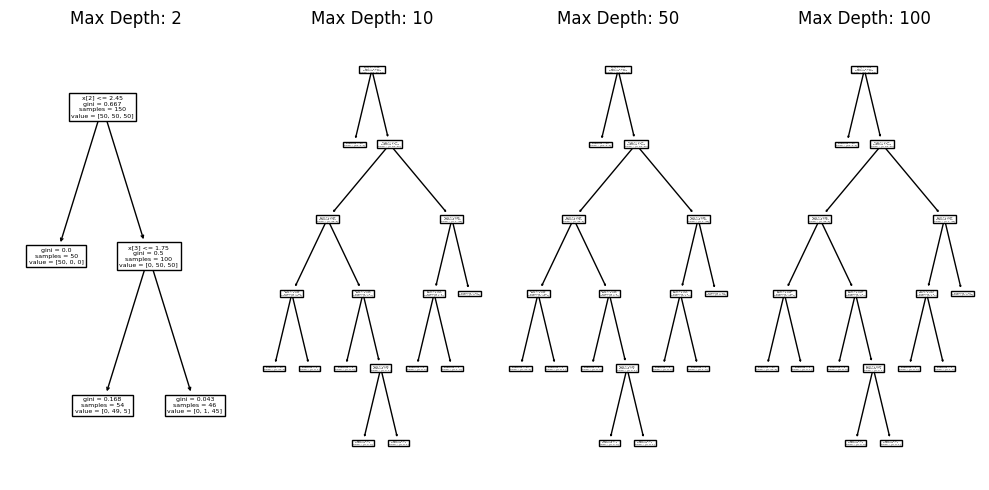

In [68]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


iris = load_iris()
X, y = iris.data, iris.target


max_depth_values = [2, 10, 50, 100]


fig, axes = plt.subplots(nrows=1, ncols=len(max_depth_values), figsize=(10, 5))


for i, max_depth in enumerate(max_depth_values):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    
    accuracy = cross_val_score(clf, X, y, cv=5).mean()

    print(f"Max Depth: {max_depth}, Accuracy: {accuracy:.4f}")
    
    clf.fit(X, y)
    
    tree.plot_tree(clf, ax=axes[i])
    axes[i].set_title(f"Max Depth: {max_depth}")
    print(f"Max Depth: {max_depth}, Number of if-then clauses: {clf.tree_.node_count - 1}")

plt.tight_layout()
plt.show()


#### c

In the final phase of experimentation, I applied the decision tree program developed earlier to a completely random dataset generated artificially. Beyond solely varying the max depth parameter, I extended the scope of investigation to include alterations in the number of input columns (from 4 to 100) and the number of instances (from 100 to 1000).

The detailed results and visualizations are as follows.

Random binary dataset of size 100, 4 features:

Max Depth: 2, Accuracy: 0.5600
Max Depth: 2, Number of if-then clauses: 6
Max Depth: 10, Accuracy: 0.4800
Max Depth: 10, Number of if-then clauses: 40
Max Depth: 50, Accuracy: 0.4900
Max Depth: 50, Number of if-then clauses: 62
Max Depth: 100, Accuracy: 0.5300
Max Depth: 100, Number of if-then clauses: 62


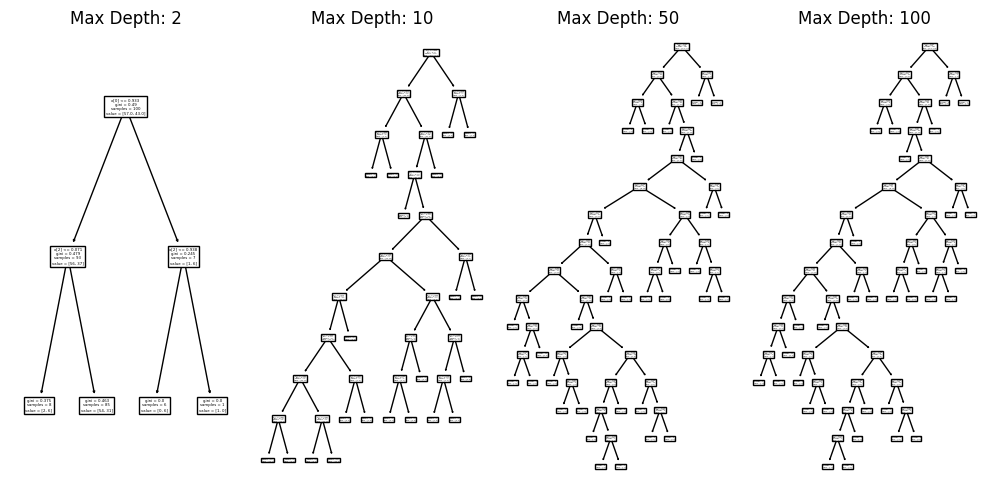

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


np.random.seed(42)
X = np.random.rand(100, 4)
y = np.random.randint(2, size=100)


max_depth_values = [2, 10, 50, 100]


fig, axes = plt.subplots(nrows=1, ncols=len(max_depth_values), figsize=(10, 5))


for i, max_depth in enumerate(max_depth_values):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    
    accuracy = cross_val_score(clf, X, y, cv=5).mean()
    
    print(f"Max Depth: {max_depth}, Accuracy: {accuracy:.4f}")
    
    clf.fit(X, y)
    
    tree.plot_tree(clf, ax=axes[i])
    axes[i].set_title(f"Max Depth: {max_depth}")
    
    print(f"Max Depth: {max_depth}, Number of if-then clauses: {clf.tree_.node_count - 1}")

plt.tight_layout()
plt.show()


Random binary dataset of size 1000, 4 features:

Max Depth: 2, Accuracy: 0.4910
Max Depth: 2, Number of if-then clauses: 6
Max Depth: 10, Accuracy: 0.5070
Max Depth: 10, Number of if-then clauses: 292
Max Depth: 50, Accuracy: 0.5230
Max Depth: 50, Number of if-then clauses: 542
Max Depth: 100, Accuracy: 0.5110
Max Depth: 100, Number of if-then clauses: 552


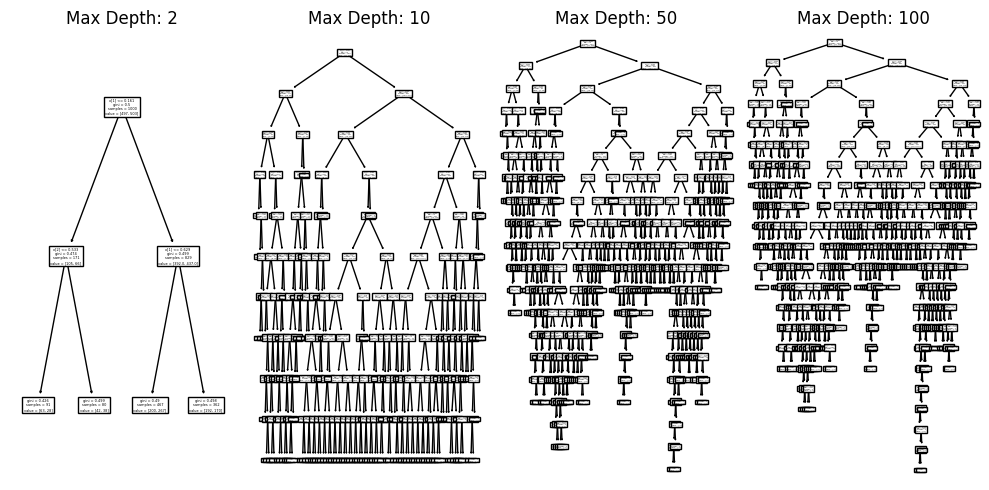

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


np.random.seed(42)
X = np.random.rand(1000, 4)
y = np.random.randint(2, size=1000)


max_depth_values = [2, 10, 50, 100]


fig, axes = plt.subplots(nrows=1, ncols=len(max_depth_values), figsize=(10, 5))


for i, max_depth in enumerate(max_depth_values):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    
    accuracy = cross_val_score(clf, X, y, cv=5).mean()
    
    print(f"Max Depth: {max_depth}, Accuracy: {accuracy:.4f}")
    
    clf.fit(X, y)
    
    tree.plot_tree(clf, ax=axes[i])
    axes[i].set_title(f"Max Depth: {max_depth}")
    print(f"Max Depth: {max_depth}, Number of if-then clauses: {clf.tree_.node_count - 1}")

plt.tight_layout()
plt.show()


Random binary dataset of size 1000, 100 features:

Max Depth: 2, Accuracy: 0.5270
Max Depth: 2, Number of if-then clauses: 6
Max Depth: 10, Accuracy: 0.4800
Max Depth: 10, Number of if-then clauses: 198
Max Depth: 50, Accuracy: 0.4940
Max Depth: 50, Number of if-then clauses: 276
Max Depth: 100, Accuracy: 0.4890
Max Depth: 100, Number of if-then clauses: 280


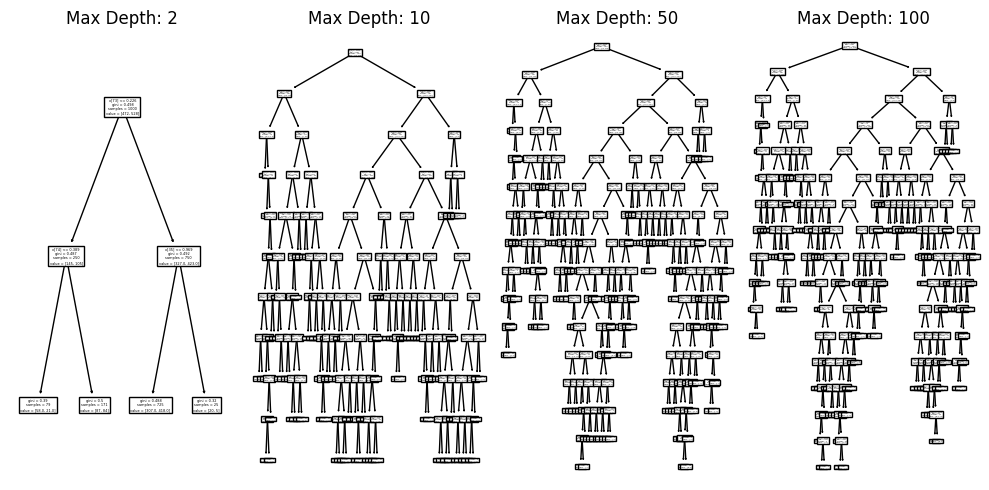

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


np.random.seed(42)
X = np.random.rand(1000, 100)
y = np.random.randint(2, size=1000)


max_depth_values = [2, 10, 50, 100]


fig, axes = plt.subplots(nrows=1, ncols=len(max_depth_values), figsize=(10, 5))


for i, max_depth in enumerate(max_depth_values):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    
    accuracy = cross_val_score(clf, X, y, cv=5).mean()
    
    print(f"Max Depth: {max_depth}, Accuracy: {accuracy:.4f}")
    
    clf.fit(X, y)
    
    tree.plot_tree(clf, ax=axes[i])
    axes[i].set_title(f"Max Depth: {max_depth}")
    print(f"Max Depth: {max_depth}, Number of if-then clauses: {clf.tree_.node_count - 1}")

plt.tight_layout()
plt.show()


### Exercise 6.3

#### a

My algorithm computes the number of bits required to represent each character in the string. Since there are 26 lowercase letters in the English alphabet, each character requires $log_2^{26}$ to be represented. Next, it calculates the total number of bits required to represent the entire string by multiplying the length of the string by the number of bits per character. It uses `math.ceil()` to ensure that the total number of bits is rounded up to the nearest integer. Finally, it computes the compression ratio by dividing the original size of the string (measured in bytes and converted to bits) by the total number of bits required to represent the string.

In [22]:
import random
import string
import math


def generate_random_string(length):
    return ''.join(random.choice(string.ascii_lowercase) for _ in range(length))


def calculate_compression_ratio(string):
    bits_per_char = math.log2(26)
    total_bits = math.ceil(len(string) * bits_per_char)
    original_size = len(string) * 8
    return float(original_size) / total_bits

# Generate a long random string
for i in [10, 20, 1000, 100000, 10000000]:
    long_random_string = generate_random_string(i)

    # Calculate the expected compression ratio based on log_2(26) bits per character
    compression_ratio = calculate_compression_ratio(long_random_string)

    print(f"Compression Ratio: {compression_ratio:.5f}")

Compression Ratio: 1.66667
Compression Ratio: 1.68421
Compression Ratio: 1.70177
Compression Ratio: 1.70197
Compression Ratio: 1.70197


#### b

The expected ratio is 1.70. This is because the expected bits per char is $log_2^{26}$. So the expected ratio is $\dfrac{8}{log_2^{26}} \approx 1.70$

### Exercise 8.1

#### a

$4\times 3+3+3= 18$

#### b

$3+4+4=11$

#### c

The maximum amount of rows of the network in (a) can memorize: 18; the maximum amount of rows of the network in (b) can memorize: 11

#### d

The maximum amount of rows of the network in (a) can memorize for 4 classes: 18 // 2 = 9; the maximum amount of rows of the network in (b) can memorize for 4 classes: 11 // 2 = 5

### Exercise 8.2

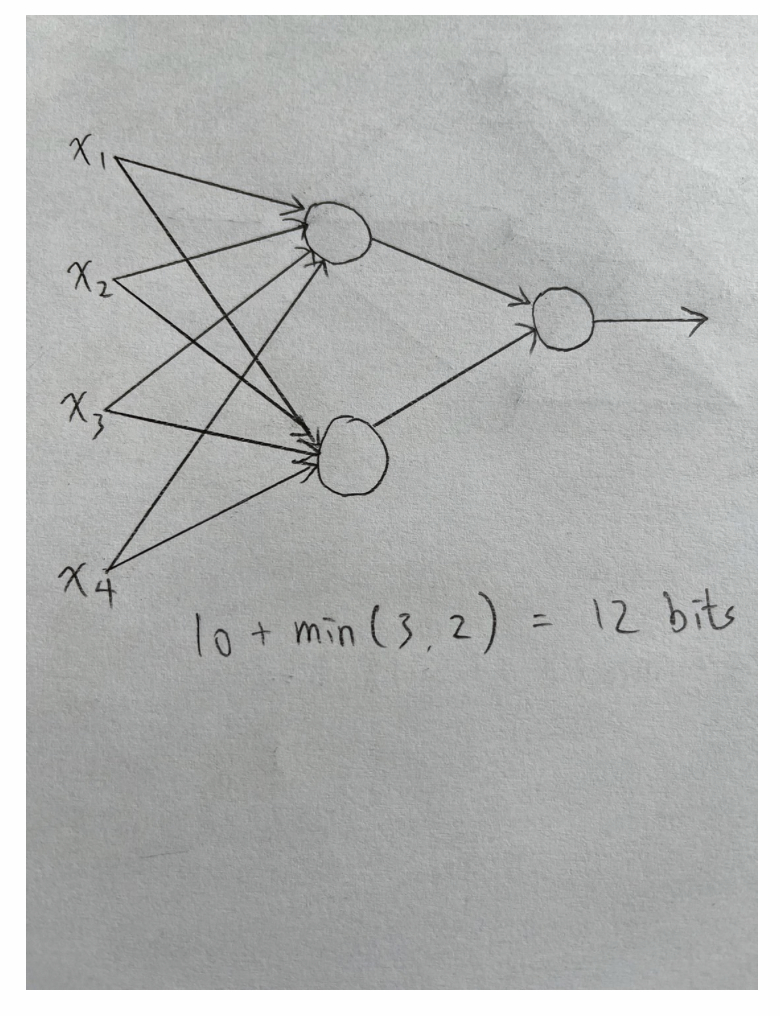

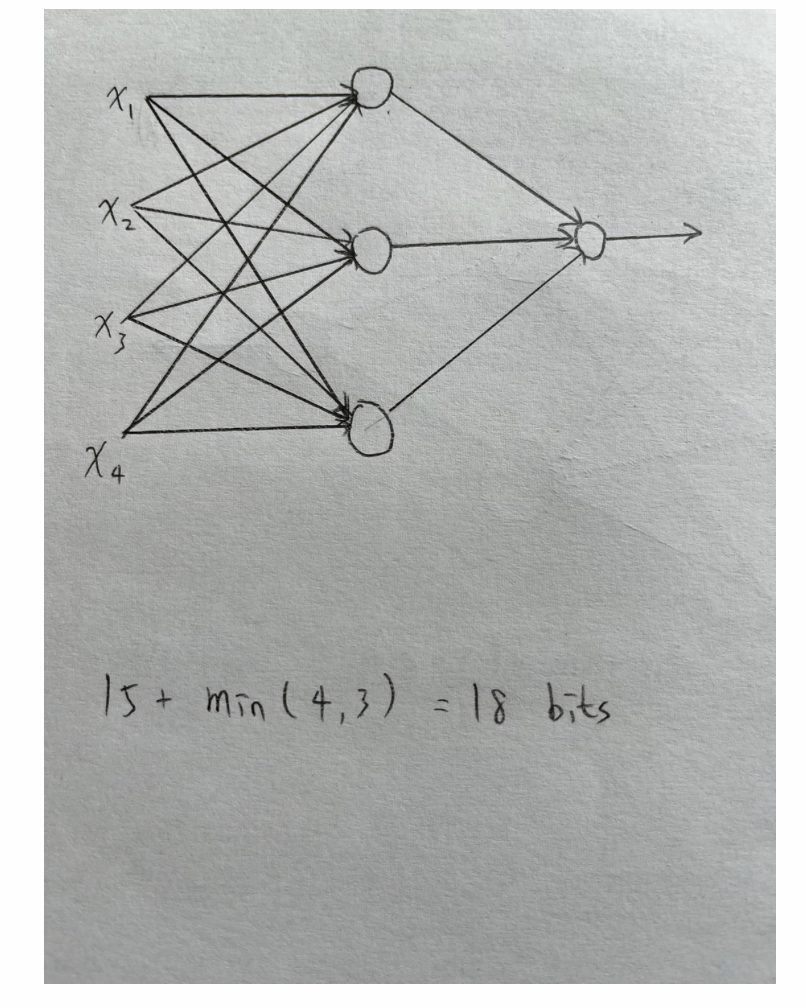

### Exercise 8.4

#### a

- The total sensory experience in bits that you have had in your life – visual information, auditory information etc. 
  - Estimated visual information
    - 80 years × 365 days/year × 24 hours/day × 3600 seconds/hour × 30 frames/second × 24 bits/frame ≈ 4,231,161,600,000,000 bits
  - Esimated auditory information:
    - Auditory information per second ≈ (19,980 Hz) × 16 bits/sample × 3600 seconds/hour × 16 hours/day
    - Total auditory information intake ≈ 183,321,600,000 bits/day × 365 days/year × 80 years ≈ 3,769,056,000,000,000 bits
  - Total Sensory Experience ≈ 4,231,161,600,000,000 bits + 3,769,056,000,000,000 bits ≈ 8,000,217,600,000,000 bits ≈ $8\times10^{15}$ bits
- Information content of the works of Shakespeare
  - Assume number of words in the works of Shakespeare is 884,421
  - Assume average word length is 5 characters
  - Assume average character bits is 1.6
  - Information content = total characters × average character bits = (884,421 words × 5 characters/word) × 1.6 bits/character = 7,075,368 bits
- The capacity of your brain assuming you have $10^{11}$ neurons each making 1000 synaptic connections and that the (information) capacity result for one neuron (two bits per connection) applies is $10^{11} \times 10^3 \times 2 = 2 \times 10^{14}$ bits.
- In summary, our brain could fit total information content of the works of Shakespeare but could not fit the total sensory experience we have in our life.

#### b

The following is the pseudocode for my expansion to multi-class classification for algorithm 8. Suppose `x` is an array of length n that contains d-dimentional vectors x, `labels` is a column of 0 or 1 with length n:
```
def memorize(x, labels):
    threshold = 0
    for row in rows:
        table[row] = (sum([x[row][i] for i in range(d)]), label[row])
    sorted_table = sort(table, key="col0")
    class = 0
    for row in rows:
        if not sorted_table[row][1] == class:
            class = sorted_table[row][1]
            threshold += 1
    minthreshs = log2(threshold) + 1
    mec = (minthreshs * (d+1)) + (minthreshs)
    return mec
```
For multi-class classification, the alogirthm is similar to algorithm 8, as the threshold is also calculated by the number of switches between classes.

#### c

The following is the pseudocode for my expansion to regression for algorithm 8. Suppose `x` is an array of length n that contains d-dimentional vectors x, `labels` is a column of 0 or 1 with length n, `epsilon` is used for differentiate bewtween regression predictions:
```
def memorize(x, labels, epsilon):
    threshold = 0
    for row in rows:
        table[row] = (sum([x[row][i] for i in range(d)]), label[row])
    sorted_table = sort(table, key="col0")
    target = sorted_table[0][1]
    for row in range(1, rows):
        if abs(sorted_table[row][1] - target) > epsilon:
            target = sorted_table[row][1]
            threshold += 1
    minthreshs = log2(threshold) + 1
    mec = (minthreshs * (d+1)) + (minthreshs)
    return mec
```
For regression, I introduced `epsilon` to help calculate the threshold for continuous predictions.

### Exercise 9.1

I experimented with three models of different MEC according to the measurement proposed in the book to reduce the hyperparameter search space.

Model settings:
- Model 1 exhibits an MEC of 100682, indicating a moderate level of memory-equivalent capacity.
- Model 2 shows a lower MEC of 50314, suggesting a comparatively simpler architecture.
- Model 3 displays the highest MEC at 201290, even larger than the total data information of the dataset, which stands at about 199316.

Model performance observation:
- Model 1 has the best performance, as demonstrated by the test loss and accuracy figures.
- Despite having the lowest MEC, Model 2 manages to maintain competitive generalization capability.
- Model 3 fails to exhibit an improvement in performance over Models 1 and 2, as evidenced by the test loss and accuracy plots. This suggests that the model's capacity may be too high relative to the complexity of the dataset.
- This observation suggests that higher MEC does not necessarily translate to superior performance.

In [83]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt


# MEC: 785x128+128+64+10=100682
class Clf1(nn.Module):
    def __init__(self):
        super(Clf1, self).__init__()
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
        )
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc(x)
        return x

# MEC: 785x64+64+10=50314
class Clf2(nn.Module):
    def __init__(self):
        super(Clf2, self).__init__()
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
        )
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc(x)
        return x

# MEC: 785x256+256+64+10=201290
class Clf3(nn.Module):
    def __init__(self):
        super(Clf3, self).__init__()
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
        )
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc(x)
        return x


def get_data_info(data):
    mec = 0
    for i in range(10):
        mec += -data.count(i) * np.log2(data.count(i)/len(data))
    return mec

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

training_data = datasets.FashionMNIST(
    root="/tmp/data",
    train=True,
    # if dataset is downloaded, it will not be downloaded again
    download=True,
    transform=transform,
)

# Download test data from open datasets
test_data = datasets.FashionMNIST(
    root="/tmp/data",
    train=False,
    download=True,
    transform=transform,
)
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

data_info = get_data_info([y for _, y in training_data])
print("Data information: ", data_info)
models = [Clf1(), Clf2(), Clf3()]
loss_fn = nn.CrossEntropyLoss()

train_losses = [[] for _ in range(len(models))]
test_losses = [[] for _ in range(len(models))]
test_accuracies = [[] for _ in range(len(models))]

for i, model in enumerate(models):
    optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)
    for epoch in range(50):
        model.train()
        train_loss = 0
        for X, y in train_dataloader:
            pred = model(X)
            loss = loss_fn(pred, y)
            train_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        train_loss /= len(train_dataloader)
        train_losses[i].append(train_loss)
        model.eval()
        test_loss, num_correct, num_total = 0, 0, 0
        with torch.no_grad():
            for X, y in test_dataloader:
                pred = model(X)
                loss = loss_fn(pred, y)

                test_loss += loss.item()

                num_total += y.shape[0]
                num_correct += (pred.argmax(1) == y).sum().item()

        test_loss /= len(test_dataloader)
        test_losses[i].append(test_loss)
        test_accuracy = num_correct / num_total
        test_accuracies[i].append(test_accuracy)

Data information:  199315.68569324174


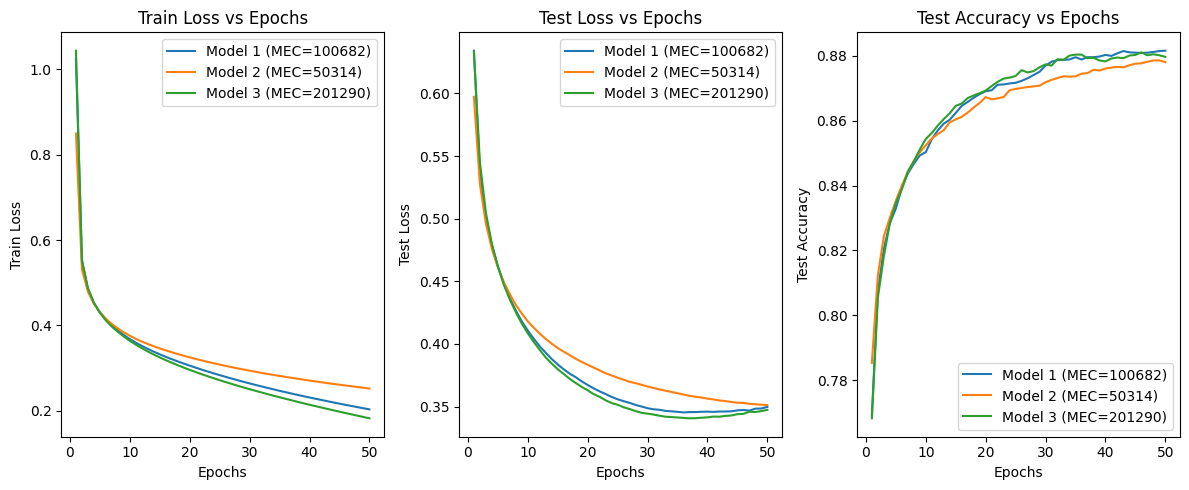

In [84]:
mecs = [100682, 50314, 201290]
epochs = range(1, 51)

plt.figure(figsize=(12, 5))

# Plot train loss for all models
plt.subplot(1, 3, 1)
for i in range(len(models)):
    plt.plot(epochs, train_losses[i], label=f"Model {i+1} (MEC={mecs[i]})")
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Train Loss vs Epochs')
plt.legend()

# Plot test loss for all models
plt.subplot(1, 3, 2)
for i in range(len(models)):
    plt.plot(epochs, test_losses[i], label=f"Model {i+1} (MEC={mecs[i]})")
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Test Loss vs Epochs')
plt.legend()

# Plot test accuracy for all models
plt.subplot(1, 3, 3)
for i in range(len(models)):
    plt.plot(epochs, test_accuracies[i], label=f"Model {i+1} (MEC={mecs[i]})")
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Epochs')
plt.legend()

plt.tight_layout()
plt.show()